In [1]:

try:
    isMaster
except NameError:
    isMaster = False
    
    from app.dotenv import base_dir, data_dir
    from app.object_detection.yolo import loadYOLOv8Model 
    from app.load_data import *
    from app.change_detect.opticalflow import *
    from app.object_detection.cropROI import *
    from app.object_detection.yolo import inferenceYOLOv8Model,plotClassifcation
    model = loadYOLOv8Model(data_dir)
    video_fname = 'vtest.avi'
    save_path = f'{data_dir}\{video_fname.split(".")[0]}'
    frame_num = 3
    print('isMaster:', isMaster)
    baseModel = 'MOG2'#'consecutive_frame'


# from app.utils import *

# from app.model.model import  Model
# import os

# print('dotenv params:', {os.getenv('PARAM1')})
# print('base_dir:', base_dir)
# print('data_dir:', data_dir)

# model = Model()
# print('model:', model)







Model YOLO V8 weights loaded successfully
isMaster: False


#### Detecting the change

Background subtraction base model


In [2]:
# pass

load image and Background base model

baseModel: MOG2


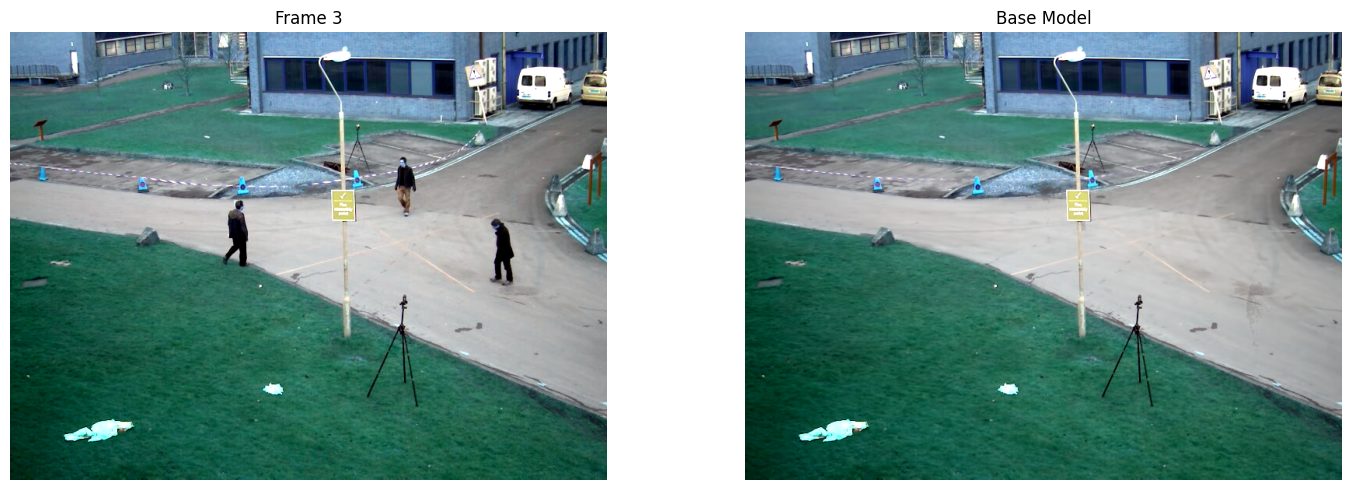

In [3]:
if not isMaster:
    next_rgb = loadFrame(save_path =f"{save_path}/{frame_num}.png")
    if baseModel == 'consecutive_frame':  # consecutive frame used as background baseModel for change detection
        baseModel_rgb = loadFrame(save_path = f"{save_path}/{frame_num-1}.png")
    else:  # background model used for change detection
        print(f'baseModel: {baseModel}')
        baseModel_fname = os.path.join(f'{data_dir}\{video_fname.split(".")[0]}/background_models', f'background_model_{baseModel}.png')
        baseModel_rgb = loadFrame(baseModel_fname)

#         try:
#     isMaster
# except NameError:
#     print('isMaster:', False)
    
#     from app.dotenv import base_dir, data_dir
#     from app.change_detect.background_baseline.background_subtractors import apply_bg_subtraction,save_background_model,methods
#     import os
    

#     video_fname = 'vtest.avi'
#     save_path = f'{data_dir}\{video_fname.split(".")[0]}'
    
#     # List all image files in both folders (can be the same folder)
#     folder1_add,folder2_add = save_path,save_path
#     background_models_add = f'{folder1_add}/background_models'  # Folder to save background models

if not isMaster:
    plotFrames(next_rgb,baseModel_rgb, str1 = f'Frame {frame_num}')


In [4]:
# import cv2 as cv
# import numpy as np

# # 1. Smoothing Filter (Gaussian Blur)
# def fix_with_smoothing(pixelized_frame, kernel_size=(5, 5)):
#     """
#     Restores a pixelized image by applying a Gaussian blur to smooth out the pixel blocks.
    
#     Args:
#         pixelized_frame (np.array): The pixelized input frame.
#         kernel_size (tuple): Size of the kernel used for the Gaussian blur.
        
#     Returns:
#         np.array: The smoothed frame with reduced pixelization.
#     """
#     # Apply Gaussian Blur to smooth out the pixelization
#     smoothed_frame = cv.GaussianBlur(pixelized_frame, kernel_size, 0)
#     return smoothed_frame


# # 2. Bilateral Filter
# def fix_with_bilateral_filter(pixelized_frame, d=9, sigma_color=75, sigma_space=75):
#     """
#     Restores a pixelized image by applying a bilateral filter to reduce blockiness and preserve edges.
    
#     Args:
#         pixelized_frame (np.array): The pixelized input frame.
#         d (int): Diameter of the pixel neighborhood used during filtering.
#         sigma_color (float): Filter sigma in color space.
#         sigma_space (float): Filter sigma in coordinate space.
        
#     Returns:
#         np.array: The restored frame with reduced pixelization.
#     """
#     # Apply bilateral filter to reduce blockiness and restore details
#     restored_frame = cv.bilateralFilter(pixelized_frame, d, sigma_color, sigma_space)
    
#     return restored_frame


# # 3. Interpolation Methods
# def fix_with_interpolation(pixelized_frame, interpolation_method=cv.INTER_LINEAR):
#     """
#     Restores a pixelized image by resizing the image with interpolation to reduce pixelation.
    
#     Args:
#         pixelized_frame (np.array): The pixelized input frame.
#         interpolation_method (int): The interpolation method used for resizing.
        
#     Returns:
#         np.array: The frame after applying interpolation.
#     """
#     # Get the original frame size (height, width)
#     height, width = pixelized_frame.shape[:2]
    
#     # Resize the image using the specified interpolation method
#     restored_frame = cv.resize(pixelized_frame, (width, height), interpolation=interpolation_method)
#     return restored_frame

In [5]:
# # Pixelize the frame
# frame = next_rgb
# pixelized_frame = pixelize_frame(frame, resolution_decrease=3)

# # Apply different restoration methods

# # 1. Apply Smoothing Filter
# smoothed_frame = fix_with_smoothing(pixelized_frame.copy(), kernel_size=(5, 5))

# # 2. Apply Bilateral Filter
# bilateral_frame = fix_with_bilateral_filter(pixelized_frame.copy(), d=4, sigma_color=75, sigma_space=75)

# # 3. Apply Interpolation
# interpolated_frame = fix_with_interpolation(pixelized_frame.copy(), interpolation_method=cv.INTER_CUBIC)

# # Display the results
# from matplotlib import pyplot as plt
# plt.figure(figsize=(12, 8))
# plt.imshow(frame)
# plt.figure(figsize=(12, 8))
# plt.imshow(pixelized_frame)
# plt.figure(figsize=(12, 8))
# plt.imshow(smoothed_frame)
# plt.figure(figsize=(12, 8))
# plt.imshow(bilateral_frame)
# plt.figure(figsize=(12, 8))
# plt.imshow(interpolated_frame)


# # cv.waitKey(0)
# # cv.destroyAllWindows()

#### detect the change

1. optical flow

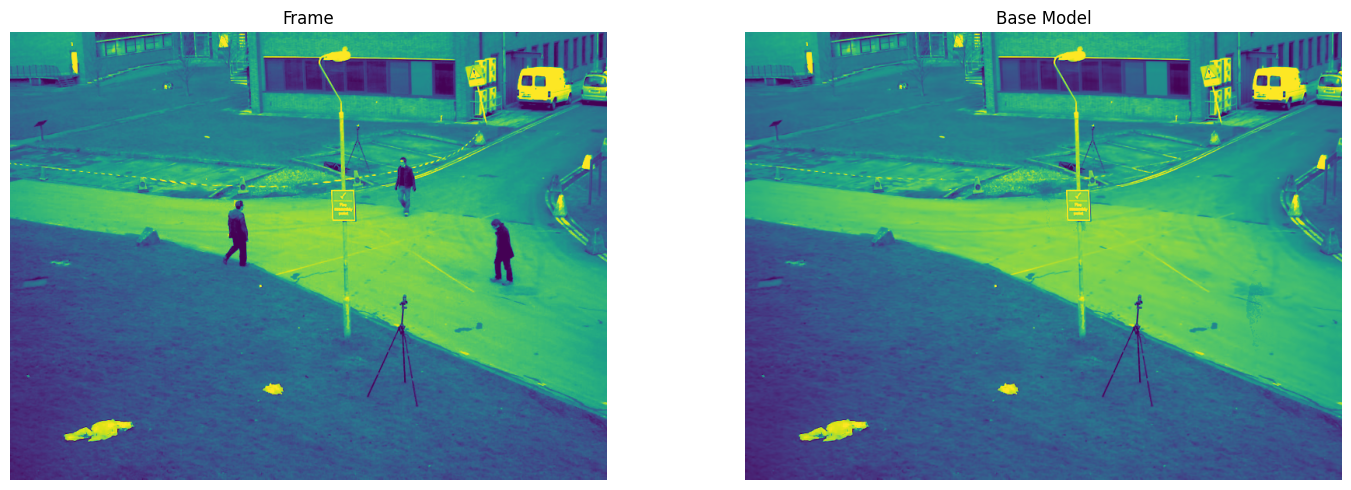

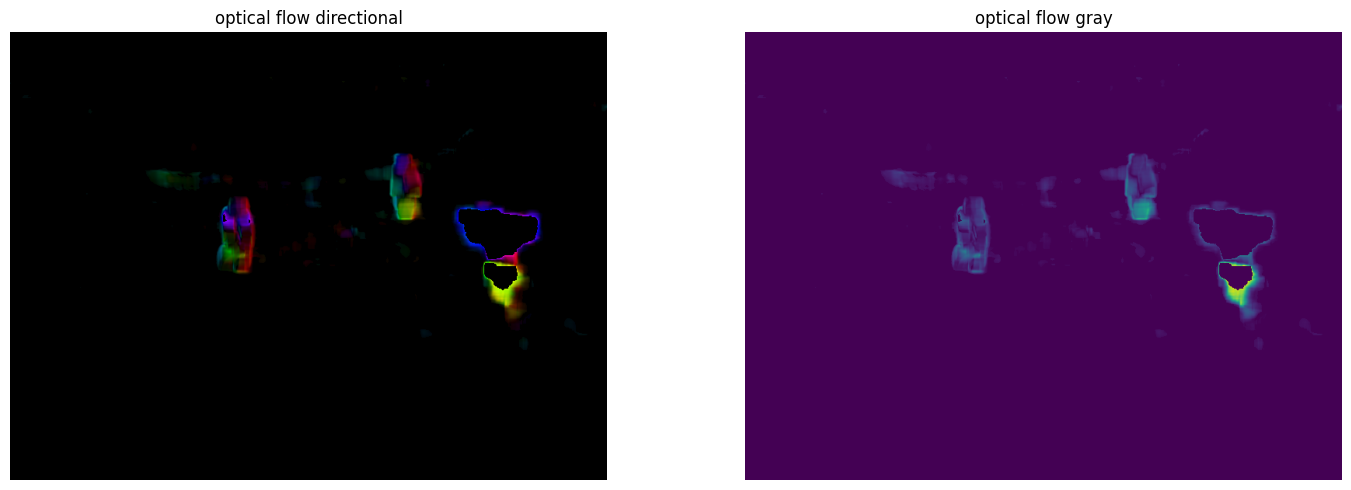

In [6]:


next_gray = grayFrame(next_rgb)
baseModel_gray = grayFrame(baseModel_rgb)
if not isMaster:
    plotFrames(next_gray,baseModel_gray)

# consecutive frame used as baseModel 




OpticalFlow_rgb,OpticalFlow_gray = opticalFlow(baseModel_gray, next_gray) 
if not isMaster:
    plotFrames(OpticalFlow_rgb,OpticalFlow_gray,'optical flow directional','optical flow gray') 
        
    
    





#### Object detection - ROI
1. find ROIs
2. crop image
3. save crop to file

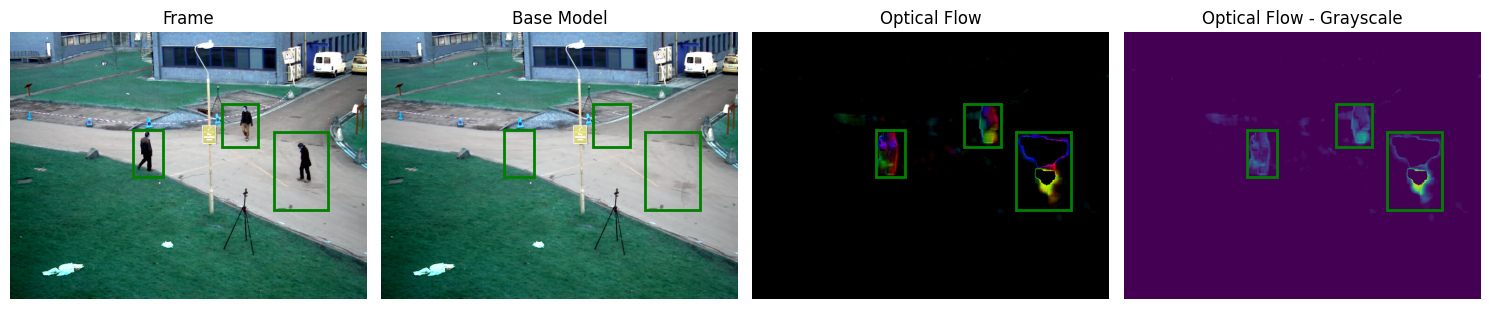

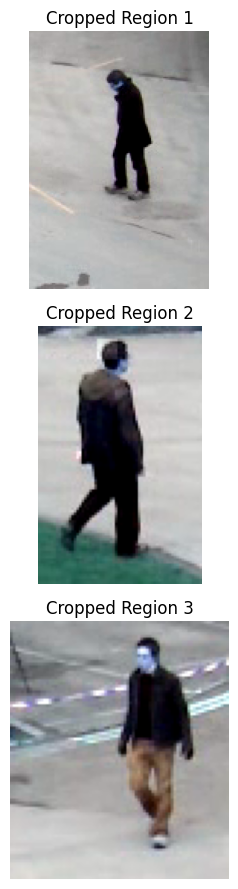

In [7]:


adaptiveThreshold = adaptiveThresh(OpticalFlow_gray,thresh_type=0)
roi_coords = detectROIs(adaptiveThreshold,OpticalFlow_rgb)
cropped_regions = cropROI( roi_coords,image = next_rgb)

if not isMaster:
    plotWithROIs(roi_coords,baseModel_rgb, next_rgb, OpticalFlow_rgb)
    # saveImagesList(cropped_regions,save_path = f'{data_dir}\\ROIs')
    # cropped_regions = loadImagesList(save_path = f'{data_dir}\\ROIs')
    plotCrop(cropped_regions)


#### Object detection - detect inside ROI

load yolo v8

In [8]:

# from app.object_detection.yolo import inferenceYOLOv8Model,plotClassifcation
# from app.object_detection.yolo import loadYOLOv8Model 
# model = loadYOLOv8Model(data_dir)


inference

In [9]:
roi_detected = inferenceYOLOv8Model(model,imgs = cropped_regions)

    

[{'confidence': array(     0.9035, dtype=float32), 'class': 0, 'name': 'person'}, {'confidence': array(    0.78472, dtype=float32), 'class': 0, 'name': 'person'}, {'confidence': array(    0.89478, dtype=float32), 'class': 0, 'name': 'person'}]


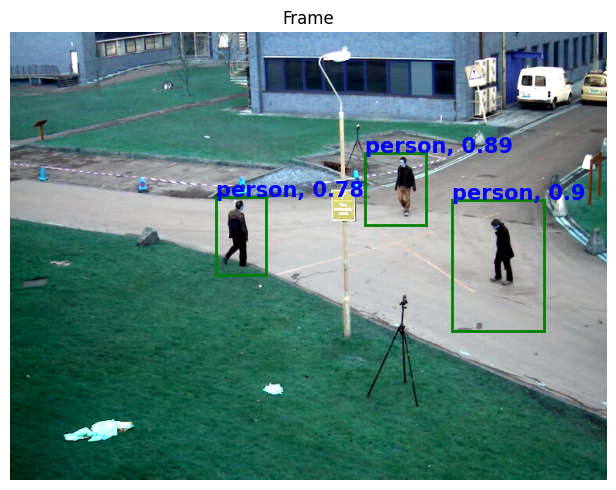

In [10]:
if not isMaster:
    print(roi_detected)
    plotClassifcation(roi_coords, next_rgb,roi_detected)

In [11]:
# import cv2
# import numpy as np
# from ultralytics import YOLO

# # Load the pretrained YOLO model
# model = YOLO('yolov5s.pt')  # Using YOLOv5s for this example

# def preprocess_image(img, input_size):
#     """
#     Resize and pad image to match the model's input requirements.
#     """
#     height, width = img.shape[:2]
#     scale = min(input_size[1] / width, input_size[0] / height)
#     new_width = int(width * scale)
#     new_height = int(height * scale)

#     # Resize the image
#     resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

#     # Create a blank canvas for padding
#     padded = np.full((input_size[0], input_size[1], 3), 128, dtype=np.uint8)
#     x_offset = (input_size[1] - new_width) // 2
#     y_offset = (input_size[0] - new_height) // 2
#     padded[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized

#     return padded, scale, x_offset, y_offset

# def detect_objects_in_roi(img, roi, model):
#     """
#     Detect objects within a specified ROI using YOLO.
#     """
#     # Crop the ROI
#     x, y, w, h = roi
#     cropped_img = img[y:y+h, x:x+w]

#     # Preprocess the cropped image
#     input_size = (640, 640)  # YOLOv5 default input size
#     preprocessed_img, scale, x_offset, y_offset = preprocess_image(cropped_img, input_size)

#     # Perform detection
#     results = model(preprocessed_img)

#     # Extract results
#     predictions = []
#     for result in results.xyxy[0]:  # xyxy format contains bounding boxes
#         xmin, ymin, xmax, ymax, conf, cls = result[:6]
#         predictions.append({
#             "class": int(cls),
#             "confidence": float(conf),
#             "bbox": [
#                 int((xmin - x_offset) / scale + x),
#                 int((ymin - y_offset) / scale + y),
#                 int((xmax - x_offset) / scale + x),
#                 int((ymax - y_offset) / scale + y),
#             ]
#         })
#     return predictions

# # Example usage:
# # Assume 'img' is a loaded BGR image (e.g., using cv2.imread).
# img = cv2.imread('path_to_image.jpg')

# # Define the ROI (x, y, width, height)
# roi = (100, 50, 300, 300)

# # Detect objects in the ROI
# detections = detect_objects_in_roi(img, roi, model)

# # Print the results
# for det in detections:
#     print(f"Class: {det['class']}, Confidence: {det['confidence']:.2f}, BBox: {det['bbox']}")

# # Optional: Visualize results
# for det in detections:
#     x1, y1, x2, y2 = det['bbox']
#     cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#     cv2.putText(img, f"{det['class']} ({det['confidence']:.2f})", 
#                 (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# cv2.imshow('Detections', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
